In [2]:
import pandas as pd
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns

In [3]:
review = pd.read_csv(r'C:/Users/abdul/Desktop/reviews_final.csv')

In [4]:
inspection = pd.read_csv(r"C:/Users/abdul/Desktop/inspections_final.csv")

In [5]:
rev = review

In [6]:
#for viewing full information of cells
def display_dataframe_without_trim():
    pd.set_option('display.max_rows', None)
    pd.set_option('display.max_columns', None)
    pd.set_option('display.width', None)
    pd.set_option('display.max_colwidth', 100)

In [7]:
display_dataframe_without_trim()

### Cleaning and Tokenizing

In [0]:
rev.head()

review_id                 user_id             business_id  \
0  IByf6mVY0WA838XNSh-5MA  3CJUJILq7CLHk_9OrvpvQg  I4Nr-MVc26qWr08-S3Q1ow   
1  qm97yMwREr7BKkexlwLFbg  TTRVdTXKcq-xn6-1IWbwEw  Gyrez6K8f1AyR7dzW9fvAw   
2  0AsmPiAQduxh5jE_si8cLA  C_hUvw2z0R-Rv0yZb6QCZA  dm6sO_Y8JdKTE1ZM955yug   
3  j3vP8537KHvoXNHQIr3haA  Z_HE_KKT7N-WddPTzUQC7A  jScBTQtdAt-8RshaiBEHgw   
4  f0B9-r14-bLudyu5S7aLhw  SvMGr_Oih7ivtzmnCL-Tmg  ujHiaprwCQ5ewziu0Vi9rw   

   stars  useful  funny  cool  \
0    4.0       0      0     0   
1    5.0       0      0     1   
2    5.0       0      0     0   
3    5.0       1      0     1   
4    1.0       1      0     0   

                                                                                                  text  \
0  The food is always good and the prices are reasonable.  Although it's not exactly a restaurant -...   
1  their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...   
2  ended up here because Raku was closed and it received great ratings on Yelp.  I'm so glad I came...   
3  Party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash Benedict, and bam ham. Eve...   
4  We had dinner at the Bellagio Buffet last night. The service was OK. Our server was great but ki...   

                  date  
0  2016-01-17 05:26:22  
1  2013-12-28 22:28:08  
2  2014-12-17 19:04:33  
3  2018-05-28 20:56:05  
4  2013-12-07 00:14:06

In [0]:
# Map of all contractions
CONTRACTION_MAP = {
"ain't": "is not", "aren't": "are not", "can't": "cannot", "can't've": "cannot have", "'cause": "because",
"could've": "could have", "couldn't": "could not", "couldn't've": "could not have", "didn't": "did not",
"doesn't": "does not", "don't": "do not", "hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not",
"haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he he will have",
"he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is", "I'd": "I would",
"I'd've": "I would have", "I'll": "I will", "I'll've": "I will have", "I'm": "I am", "I've": "I have", "i'd": "i would",
"i'd've": "i would have", "i'll": "i will", "i'll've": "i will have", "i'm": "i am", "i've": "i have", "isn't": "is not",
"it'd": "it would", "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have", "it's": "it is",
"let's": "let us", "ma'am": "madam", "mayn't": "may not", "might've": "might have", "mightn't": "might not", "mightn't've": "might not have",
"must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not",
"needn't've": "need not have", "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have",
"shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would",
"she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
"should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
"so's": "so as", "that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
"there'd've": "there would have", "there's": "there is", "they'd": "they would", "they'd've": "they would have",
"they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
"wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have",
"we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have",
"what're": "what are", "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have",
"where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have",
"who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not",
"won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have",
"y'all": "you all", "y'all'd": "you all would", "y'all'd've": "you all would have", "y'all're": "you all are",
"y'all've": "you all have", "you'd": "you would", "you'd've": "you would have", "you'll": "you will",
"you'll've": "you will have", "you're": "you are", "you've": "you have"
}


In [0]:
# returns the input sentence with contractions expanded
def expand_contractions(text, contraction_mapping):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text



expand_contractions("Y'all can't expand contractions I'd think", CONTRACTION_MAP)

'You all cannot expand contractions I would think'

In [0]:
# Expanding contractions
rev['text_clean'] = rev.apply(lambda x: expand_contractions(str(x.text).lower(), CONTRACTION_MAP), axis=1)

In [0]:
rev.head()

review_id                 user_id             business_id  \
0  IByf6mVY0WA838XNSh-5MA  3CJUJILq7CLHk_9OrvpvQg  I4Nr-MVc26qWr08-S3Q1ow   
1  qm97yMwREr7BKkexlwLFbg  TTRVdTXKcq-xn6-1IWbwEw  Gyrez6K8f1AyR7dzW9fvAw   
2  0AsmPiAQduxh5jE_si8cLA  C_hUvw2z0R-Rv0yZb6QCZA  dm6sO_Y8JdKTE1ZM955yug   
3  j3vP8537KHvoXNHQIr3haA  Z_HE_KKT7N-WddPTzUQC7A  jScBTQtdAt-8RshaiBEHgw   
4  f0B9-r14-bLudyu5S7aLhw  SvMGr_Oih7ivtzmnCL-Tmg  ujHiaprwCQ5ewziu0Vi9rw   

   stars  useful  funny  cool  \
0    4.0       0      0     0   
1    5.0       0      0     1   
2    5.0       0      0     0   
3    5.0       1      0     1   
4    1.0       1      0     0   

                                                                                                  text  \
0  The food is always good and the prices are reasonable.  Although it's not exactly a restaurant -...   
1  their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...   
2  ended up here because Raku was closed and it received great ratings on Yelp.  I'm so glad I came...   
3  Party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash Benedict, and bam ham. Eve...   
4  We had dinner at the Bellagio Buffet last night. The service was OK. Our server was great but ki...   

                  date  \
0  2016-01-17 05:26:22   
1  2013-12-28 22:28:08   
2  2014-12-17 19:04:33   
3  2018-05-28 20:56:05   
4  2013-12-07 00:14:06   

                                                                                            text_clean  
0  the food is always good and the prices are reasonable.  although it is not exactly a restaurant ...  
1  their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...  
2  ended up here because raku was closed and it received great ratings on yelp.  i am so glad i cam...  
3  party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash benedict, and bam ham. eve...  
4  we had dinner at the bellagio buffet last night. the service was ok. our server was great but ki...

In [0]:
# tokenize
rev['tokens'] = rev.apply(lambda x: nltk.word_tokenize(str(x.text_clean)), axis=1)

In [0]:
rev.tokens.head()

0    [the, food, is, always, good, and, the, prices, are, reasonable, ., although, it, is, not, exact...
1    [their, pettuccine, was, fresh-made, in, the, morning, ., it, was, very, delicate, and, yummy, !...
2    [ended, up, here, because, raku, was, closed, and, it, received, great, ratings, on, yelp, ., i,...
3    [party, of, 3, ordered, the, fish, tacos, ,, pork, belly, banh, mi, ,, corn, beef, hash, benedic...
4    [we, had, dinner, at, the, bellagio, buffet, last, night, ., the, service, was, ok., our, server...
Name: tokens, dtype: object

In [0]:
from nltk.corpus import stopwords

In [0]:
import string

In [0]:
stop_words = stopwords.words('english')
puncs = list(string.punctuation)
remove = stop_words + puncs
words = nltk.corpus.words.words()

In [0]:
remove

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [0]:
# returns a the input sentence with stop words, non-words, and punctuations removed
def clean_sent(sent_list):
    sent_list = [word for word in sent_list if word not in remove]
    sent_list = [word for word in sent_list if word.isalpha()]
    return sent_list

In [0]:
rev['tokens_clean'] = rev.apply(lambda x: clean_sent(x.tokens), axis=1 )

In [0]:
rev.tokens_clean.head()

0    [food, always, good, prices, reasonable, although, exactly, restaurant, like, snack, bar, limite...
1    [pettuccine, morning, delicate, yummy, owner, staffs, super, kind, delightful, also, veal, picca...
2    [ended, raku, closed, received, great, ratings, yelp, glad, came, one, better, meals, started, m...
3    [party, ordered, fish, tacos, pork, belly, banh, mi, corn, beef, hash, benedict, bam, ham, every...
4    [dinner, bellagio, buffet, last, night, service, server, great, kind, forgot, us, towards, end, ...
Name: tokens_clean, dtype: object

In [0]:
# pip install wordcloud

In [0]:
rev.shape

(896214, 12)

In [0]:
# drop redundant columns
rev.drop(columns=['text', 'tokens'], inplace=True)

In [0]:
# save files
rev.to_csv(r"C:/users/abdul/Desktop/review_tokenized.csv", encoding='utf-8', index=False)

### Corpus

In [8]:
rev = pd.read_csv(r"C:/users/abdul/Desktop/review_tokenized.csv")

In [9]:
# generate a random sample of 500000 records
sample = rev.sample(n=rev.shape[0], random_state=42)

In [10]:
sample.reset_index(drop=True, inplace=True)

### Word cloud

In [11]:
from wordcloud import WordCloud

In [12]:
def build_word_cloud(df, max_words=100, plt_width=20, plt_height=10):
    all_words = []
    # generating the corpus with repititions allowed
    for i in df.tokens_clean:
        a = i.split(',')
        for j in a:
            try:
                j = re.findall('[a-z]', j)
                word = ''.join(j)
                all_words.append(word)
            except:
                continue
    all_words = list(filter(lambda a: a not in ['las', 'vegas', 'food', 'place','restaurant','good','service','great'],
                             all_words))
    all_words_ = ' '.join(all_words)
    cloud = WordCloud(background_color="white", width=1600, height=800, 
                      max_words=max_words, random_state=42).generate(all_words_)
    plt.figure(figsize=(plt_width,plt_height))
    plt.imshow(cloud, interpolation='bilinear')
    plt.tight_layout(pad=0)
    plt.axis('off')

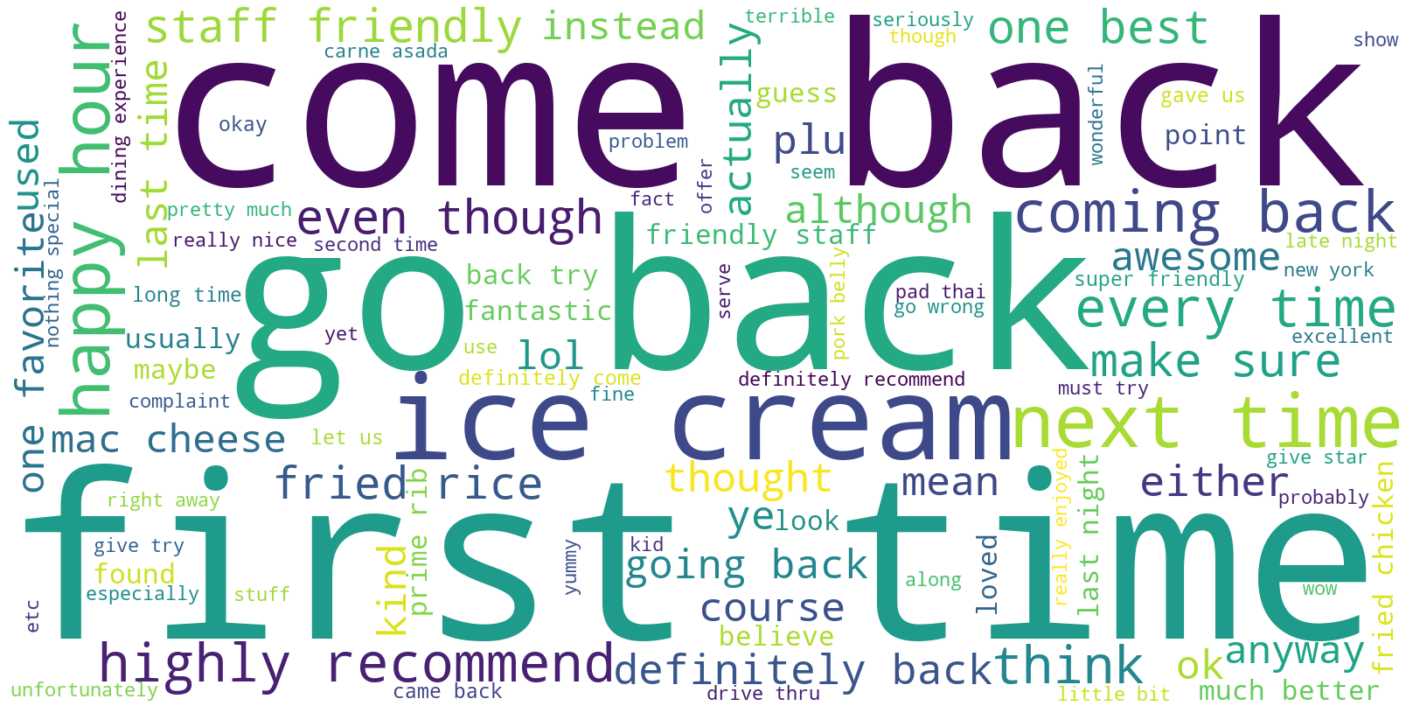

In [13]:
build_word_cloud(df=sample)

In [16]:
rev.head()

review_id                 user_id             business_id  \
0  IByf6mVY0WA838XNSh-5MA  3CJUJILq7CLHk_9OrvpvQg  I4Nr-MVc26qWr08-S3Q1ow   
1  qm97yMwREr7BKkexlwLFbg  TTRVdTXKcq-xn6-1IWbwEw  Gyrez6K8f1AyR7dzW9fvAw   
2  0AsmPiAQduxh5jE_si8cLA  C_hUvw2z0R-Rv0yZb6QCZA  dm6sO_Y8JdKTE1ZM955yug   
3  j3vP8537KHvoXNHQIr3haA  Z_HE_KKT7N-WddPTzUQC7A  jScBTQtdAt-8RshaiBEHgw   
4  f0B9-r14-bLudyu5S7aLhw  SvMGr_Oih7ivtzmnCL-Tmg  ujHiaprwCQ5ewziu0Vi9rw   

   stars  useful  funny  cool                 date  \
0    4.0       0      0     0  2016-01-17 05:26:22   
1    5.0       0      0     1  2013-12-28 22:28:08   
2    5.0       0      0     0  2014-12-17 19:04:33   
3    5.0       1      0     1  2018-05-28 20:56:05   
4    1.0       1      0     0  2013-12-07 00:14:06   

                                          text_clean  \
0  the food is always good and the prices are rea...   
1  their pettuccine was fresh-made in the morning...   
2  ended up here because raku was closed and it r...   
3  party of 3 ordered the fish tacos, pork belly ...   
4  we had dinner at the bellagio buffet last nigh...   

                                        tokens_clean  
0  ['food', 'always', 'good', 'prices', 'reasonab...  
1  ['pettuccine', 'morning', 'delicate', 'yummy',...  
2  ['ended', 'raku', 'closed', 'received', 'great...  
3  ['party', 'ordered', 'fish', 'tacos', 'pork', ...  
4  ['dinner', 'bellagio', 'buffet', 'last', 'nigh...

### Top 30 restaurants by ratings (with sufficient review count)

In [14]:
# What are the top restaurants in terms of stars
top = rev.groupby('business_id').agg({'business_id':['count'], 
                            'stars':['mean']}).sort_values([('business_id', 'count')], ascending=False)
top_30 = top[:30]

In [15]:
top_30 = pd.DataFrame(top_30.to_records())

In [16]:
top_30.columns = ['business_id', 'count', 'mean']

In [17]:
top_30 = top_30.sort_values('mean', ascending=False)
top_30 = top_30.reset_index(drop=True)
top_30

business_id  count      mean
0   mDR12Hafvr84ctpsV6YLag   2583  4.636082
1   hihud--QRriCYZw1zZvW4g   3554  4.483399
2   3kdSl5mo9dWC4clrQjEDGg   3350  4.470746
3   2iTsRqUsPGRH1li1WVRvKQ   2094  4.449857
4   fL-b760btOaGa85OJ9ut3w   2952  4.416328
5   3BCsAgo_1i4xMuTyLKMLRQ   2264  4.295053
6   KskYqH1Bi7Z_61pH6Om8pg   4131  4.229726
7   3GEEy7RP6e4bT4LAiWFMFQ   2193  4.202462
8   RwMLuOkImBIqqYj4SSKSPg   3283  4.171489
9   l_GV0hgEoTUf70uJVT0_hg   2274  4.165347
10  pH0BLkL4cbxKzu471VZnuA   2434  4.061216
11  XZbuPXdyA0ZtTu3AzqtQhg   3339  4.021563
12  LNGBEEelQx4zbfWnlc66cw   2338  3.996151
13  uGupeWqih0yIcCg8anM1PA   2564  3.992200
14  XXW_OFaYQkkGOGniujZFHg   3330  3.975976
15  QJatAcxYgK1Zp9BRZMAx7g   2880  3.974653
16  7sPNbCx7vGAaH7SbNPZ6oA   3494  3.944190
17  f4x1YBxkLrZg652xt2KR5g   5847  3.919446
18  P7pxQFqr7yBKMMI2J51udw   3225  3.895504
19  EAwh1OmG6t6p3nRaZOW_AA   2310  3.870996
20  g8OnV26ywJlZpezdBnOWUQ   3366  3.808081
21  2weQS-RnoOBhb1KsHKyoSQ   4534  3.638730
22  G-5kEa6E6PD5fkBRuA7k9Q   2984  3.582105
23  ujHiaprwCQ5ewziu0Vi9rw   4318  3.359194
24  yfxDa8RFOvJPQh0rNtakHA   3106  3.341597
25  ZkGDCVKSdf8m76cnnalL-A   2393  3.140827
26  uanCi4OGc1mHLGl_AT4JhQ   2518  3.042891
27  ii8sAGBexBOJoYRFafF9XQ   2557  2.932734
28  El4FC8jcawUVgw_0EIcbaQ   4093  2.912778
29  6Q7-wkCPc1KF75jZLOTcMw   2650  2.308302

In [18]:
inspection.head()

serial_number permit_number facility_id_x      inspection_date  \
0     DA0001807     PR0000441     FA0002435  2007-12-05 00:00:00   
1     DA0001808     PR0000441     FA0002435  2008-04-21 00:00:00   
2     DA0001809     PR0000441     FA0002435  2009-02-12 00:00:00   
3     DA0001810     PR0000441     FA0002435  2009-09-21 00:00:00   
4     DA0001811     PR0000441     FA0002435  2010-06-14 00:00:00   

       inspection_time employee_id  inspection_demerits inspection_grade  \
0  2007-12-05 15:40:00   EE7000360                  0.0                A   
1  2008-04-21 12:25:00   EE7000417                  7.0                A   
2  2009-02-12 09:20:00   EE7000417                 10.0                A   
3  2009-09-21 13:40:00   EE7000417                  3.0                A   
4  2010-06-14 12:40:00   EE7000417                  2.0                A   

  inspection_grade_new inspection_result      violations       record_updated  \
0                    A         Compliant              -1  2013-02-21 22:26:12   
1                    A         Compliant  13,19,27,31,36  2013-02-21 22:26:12   
2                    A         Compliant    14,27,31,114  2013-02-21 22:26:12   
3                    A         Compliant        19,24,27  2013-02-21 22:26:12   
4                    A         Compliant           27,37  2013-02-21 22:26:12   

      inspection_type             business_id             name  \
0  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
1  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
2  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
3  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
4  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   

               address_x       city  postal_code  latitude_x  longitude_x  \
0  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
1  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
2  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
3  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
4  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   

   stars  review_count  is_open  \
0    4.0         273.0      1.0   
1    4.0         273.0      1.0   
2    4.0         273.0      1.0   
3    4.0         273.0      1.0   
4    4.0         273.0      1.0   

                                                                                            attributes  \
0  {'GoodForKids': 'True', 'OutdoorSeating': 'False', 'Alcohol': "u'full_bar'", 'RestaurantsTakeOut...   
1  {'GoodForKids': 'True', 'OutdoorSeating': 'False', 'Alcohol': "u'full_bar'", 'RestaurantsTakeOut...   
2  {'GoodForKids': 'True', 'OutdoorSeating': 'False', 'Alcohol': "u'full_bar'", 'RestaurantsTakeOut...   
3  {'GoodForKids': 'True', 'OutdoorSeating': 'False', 'Alcohol': "u'full_bar'", 'RestaurantsTakeOut...   
4  {'GoodForKids': 'True', 'OutdoorSeating': 'False', 'Alcohol': "u'full_bar'", 'RestaurantsTakeOut...   

                                                     categories      PE  \
0  Coffee & Tea, Restaurants, Bakeries, Salad, Sandwiches, Food  1016.0   
1  Coffee & Tea, Restaurants, Bakeries, Salad, Sandwiches, Food  1016.0   
2  Coffee & Tea, Restaurants, Bakeries, Salad, Sandwiches, Food  1016.0   
3  Coffee & Tea, Restaurants, Bakeries, Salad, Sandwiches, Food  1016.0   
4  Coffee & Tea, Restaurants, Bakeries, Salad, Sandwiches, Food  1016.0   

     zip_code nciaa  record_status current_grade  current_demerits  \
0  89109-8924     Y            1.0             A               0.0   
1  89109-8924     Y            1.0             A               0.0   
2  89109-8924     Y            1.0             A               0.0   
3  89109-8924     Y            1.0             A               0.0   
4  89109-8924     Y            1.0             A               0.0   

          date_current previous_grade        date_previous  
0  2020-

In [19]:
top_30 = pd.merge(top_30, inspection[['business_id', 'name']].drop_duplicates(), how='left', on='business_id')

In [20]:
top_30

business_id  count      mean  \
0   mDR12Hafvr84ctpsV6YLag   2583  4.636082   
1   hihud--QRriCYZw1zZvW4g   3554  4.483399   
2   3kdSl5mo9dWC4clrQjEDGg   3350  4.470746   
3   2iTsRqUsPGRH1li1WVRvKQ   2094  4.449857   
4   fL-b760btOaGa85OJ9ut3w   2952  4.416328   
5   3BCsAgo_1i4xMuTyLKMLRQ   2264  4.295053   
6   KskYqH1Bi7Z_61pH6Om8pg   4131  4.229726   
7   3GEEy7RP6e4bT4LAiWFMFQ   2193  4.202462   
8   RwMLuOkImBIqqYj4SSKSPg   3283  4.171489   
9   l_GV0hgEoTUf70uJVT0_hg   2274  4.165347   
10  pH0BLkL4cbxKzu471VZnuA   2434  4.061216   
11  XZbuPXdyA0ZtTu3AzqtQhg   3339  4.021563   
12  LNGBEEelQx4zbfWnlc66cw   2338  3.996151   
13  uGupeWqih0yIcCg8anM1PA   2564  3.992200   
14  XXW_OFaYQkkGOGniujZFHg   3330  3.975976   
15  QJatAcxYgK1Zp9BRZMAx7g   2880  3.974653   
16  7sPNbCx7vGAaH7SbNPZ6oA   3494  3.944190   
17  f4x1YBxkLrZg652xt2KR5g   5847  3.919446   
18  P7pxQFqr7yBKMMI2J51udw   3225  3.895504   
19  EAwh1OmG6t6p3nRaZOW_AA   2310  3.870996   
20  g8OnV26ywJlZpezdBnOWUQ   3366  3.808081   
21  2weQS-RnoOBhb1KsHKyoSQ   4534  3.638730   
22  G-5kEa6E6PD5fkBRuA7k9Q   2984  3.582105   
23  ujHiaprwCQ5ewziu0Vi9rw   4318  3.359194   
24  yfxDa8RFOvJPQh0rNtakHA   3106  3.341597   
25  ZkGDCVKSdf8m76cnnalL-A   2393  3.140827   
26  uanCi4OGc1mHLGl_AT4JhQ   2518  3.042891   
27  ii8sAGBexBOJoYRFafF9XQ   2557  2.932734   
28  El4FC8jcawUVgw_0EIcbaQ   4093  2.912778   
29  6Q7-wkCPc1KF75jZLOTcMw   2650  2.308302   

                                           name  
0                                      Mr Mamas  
1                      Gangnam Asian BBQ Dining  
2                                       Egg & I  
3                                Carson Kitchen  
4                         Rollin Smoke Barbeque  
5                                    SkinnyFATS  
6                                 Lotus of Siam  
7                                    Pizza Rock  
8                                Tacos El Gordo  
9                                          Eat.  
10                       SUSHISAMBA - Las Vegas  
11                                   Mesa Grill  
12                              Studio B Buffet  
13                        The Palazzo Las Vegas  
14  The Peppermill Restaurant & Fireside Lounge  
15                                  Shake Shack  
16                                 Bachi Burger  
17                           Hash House A Go Go  
18                                    Holsteins  
19         Ellis Island Hotel, Casino & Brewery  
20                           Hash House A Go Go  
21                                   The Buffet  
22                                        Giada  
23                       The Buffet at Bellagio  
24                                 Pho Kim Long  
25                            Le Village Buffet  
26                              Treasure Island  
27               Paris Las Vegas Hotel & Casino  
28                              MGM Grand Hotel  
29     Circus Circus Las Vegas Hotel and Casino

### Bar plot of average ratings for top 10

In [21]:
top_10 = top_30.iloc[:10]

(0, 5)

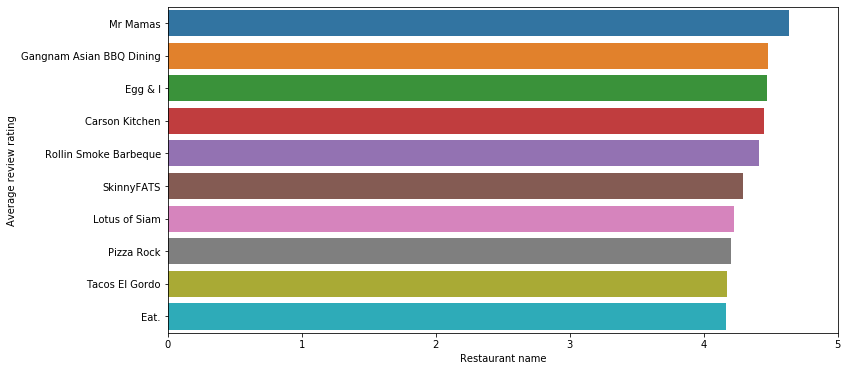

In [22]:
plt.figure(figsize=(12,6))
# Count Plot (a.k.a. Bar Plot)
x = top_10.name
sns.barplot(x='mean', y='name', data=top_10, order=x, orient='horizontal')

plt.xlabel('Restaurant name')
plt.ylabel('Average review rating')
plt.xlim(0,5)

### Word cloud for top 5

### Mr Mamas

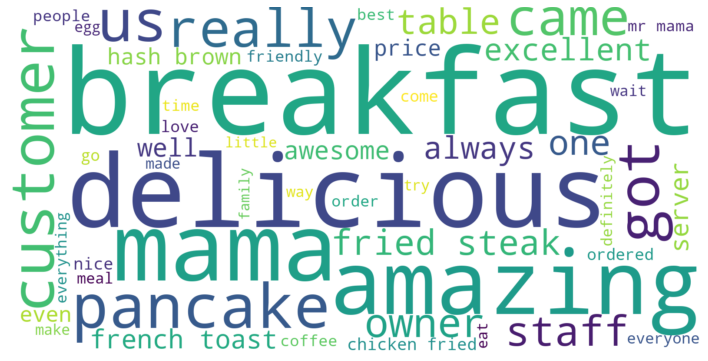

In [23]:
x = top_30.iloc[0, 0]
df1 = rev[rev.business_id == x]
build_word_cloud(df=df1, max_words=50, plt_height=6, plt_width=10)

### Gangnam Asian

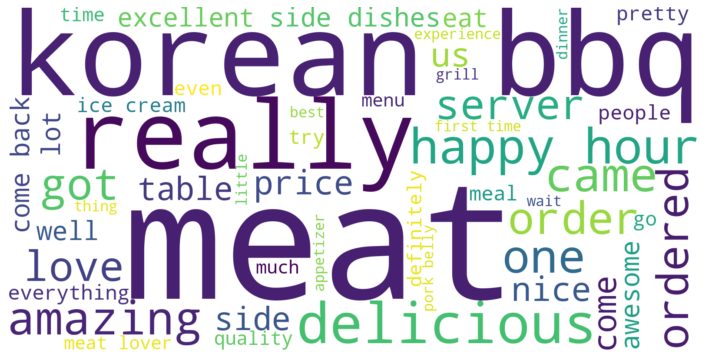

In [24]:
x = top_30.iloc[1, 0]
df1 = rev[rev.business_id == x]
build_word_cloud(df=df1, max_words=50, plt_height=6, plt_width=10)

### Egg and I

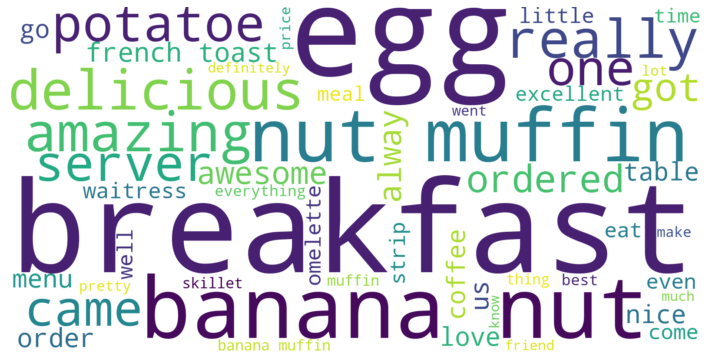

In [25]:
x = top_30.iloc[2, 0]
df1 = rev[rev.business_id == x]
build_word_cloud(df=df1, max_words=50, plt_height=6, plt_width=10)

### Carson kitchen

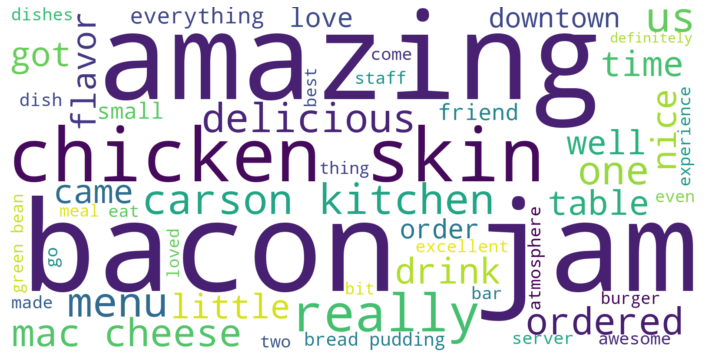

In [26]:
x = top_30.iloc[3, 0]
df1 = rev[rev.business_id == x]
build_word_cloud(df=df1, max_words=50, plt_height=6, plt_width=10)

### Rolling Smokes

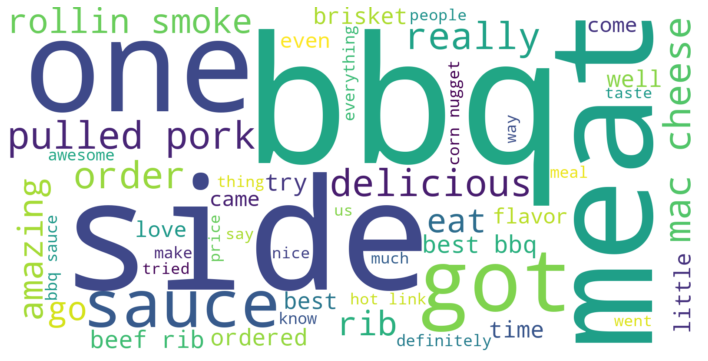

In [27]:
x = top_30.iloc[4, 0]
df1 = rev[rev.business_id == x]
build_word_cloud(df=df1, max_words=50, plt_height=6, plt_width=10)

In [28]:
rev.head()

review_id                 user_id             business_id  \
0  IByf6mVY0WA838XNSh-5MA  3CJUJILq7CLHk_9OrvpvQg  I4Nr-MVc26qWr08-S3Q1ow   
1  qm97yMwREr7BKkexlwLFbg  TTRVdTXKcq-xn6-1IWbwEw  Gyrez6K8f1AyR7dzW9fvAw   
2  0AsmPiAQduxh5jE_si8cLA  C_hUvw2z0R-Rv0yZb6QCZA  dm6sO_Y8JdKTE1ZM955yug   
3  j3vP8537KHvoXNHQIr3haA  Z_HE_KKT7N-WddPTzUQC7A  jScBTQtdAt-8RshaiBEHgw   
4  f0B9-r14-bLudyu5S7aLhw  SvMGr_Oih7ivtzmnCL-Tmg  ujHiaprwCQ5ewziu0Vi9rw   

   stars  useful  funny  cool                 date  \
0    4.0       0      0     0  2016-01-17 05:26:22   
1    5.0       0      0     1  2013-12-28 22:28:08   
2    5.0       0      0     0  2014-12-17 19:04:33   
3    5.0       1      0     1  2018-05-28 20:56:05   
4    1.0       1      0     0  2013-12-07 00:14:06   

                                                                                            text_clean  \
0  the food is always good and the prices are reasonable.  although it is not exactly a restaurant ...   
1  their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...   
2  ended up here because raku was closed and it received great ratings on yelp.  i am so glad i cam...   
3  party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash benedict, and bam ham. eve...   
4  we had dinner at the bellagio buffet last night. the service was ok. our server was great but ki...   

                                                                                          tokens_clean  
0  ['food', 'always', 'good', 'prices', 'reasonable', 'although', 'exactly', 'restaurant', 'like', ...  
1  ['pettuccine', 'morning', 'delicate', 'yummy', 'owner', 'staffs', 'super', 'kind', 'delightful',...  
2  ['ended', 'raku', 'closed', 'received', 'great', 'ratings', 'yelp', 'glad', 'came', 'one', 'bett...  
3  ['party', 'ordered', 'fish', 'tacos', 'pork', 'belly', 'banh', 'mi', 'corn', 'beef', 'hash', 'be...  
4  ['dinner', 'bellagio', 'buffet', 'last', 'night', 'service', 'server', 'great', 'kind', 'forgot'...

### Is there a relationship between review length and ratings

In [29]:
rev['review_length'] = rev.apply(lambda x: len(x.tokens_clean.split(',')), axis=1)

In [30]:
# Subsetting based on review length because of outliers
sample = rev[rev.review_length <= 100]

Text(0, 0.5, 'frequency')

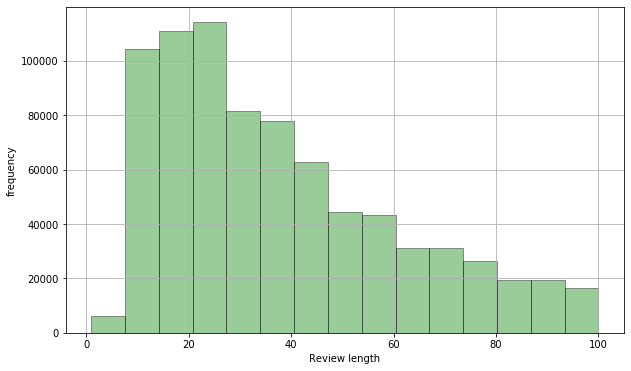

In [31]:
plt.figure(figsize=(10,6))
plt.grid()
sns.distplot(sample.review_length, kde=False, bins=15, color='green', hist_kws=dict(edgecolor="k", linewidth=1))
plt.xlabel('Review length')
plt.ylabel('frequency')

#### Majority are between 10 and 40 words long

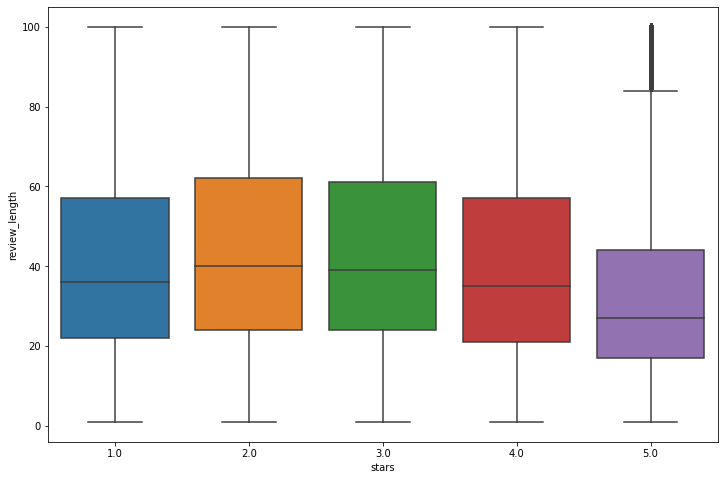

In [32]:
plt.figure(figsize=(12,8))
sns.boxplot(x='stars', y='review_length', data=sample)

#### With the exception of outliers, it seems the review length is shorter for higher ratings

## Inspections

In [33]:
inspection.head(10)

serial_number permit_number facility_id_x      inspection_date  \
0     DA0001807     PR0000441     FA0002435  2007-12-05 00:00:00   
1     DA0001808     PR0000441     FA0002435  2008-04-21 00:00:00   
2     DA0001809     PR0000441     FA0002435  2009-02-12 00:00:00   
3     DA0001810     PR0000441     FA0002435  2009-09-21 00:00:00   
4     DA0001811     PR0000441     FA0002435  2010-06-14 00:00:00   
5     DA0001818     PR0000442     FA0002435  2007-12-05 00:00:00   
6     DA0001819     PR0000442     FA0002435  2008-04-21 00:00:00   
7     DA0001820     PR0000442     FA0002435  2009-02-12 00:00:00   
8     DA0001821     PR0000442     FA0002435  2009-09-21 00:00:00   
9     DA0001822     PR0000442     FA0002435  2010-06-14 00:00:00   

       inspection_time employee_id  inspection_demerits inspection_grade  \
0  2007-12-05 15:40:00   EE7000360                  0.0                A   
1  2008-04-21 12:25:00   EE7000417                  7.0                A   
2  2009-02-12 09:20:00   EE7000417                 10.0                A   
3  2009-09-21 13:40:00   EE7000417                  3.0                A   
4  2010-06-14 12:40:00   EE7000417                  2.0                A   
5  2007-12-05 14:30:00   EE7000360                  0.0                A   
6  2008-04-21 13:10:00   EE7000417                  5.0                A   
7  2009-02-12 09:50:00   EE7000417                  8.0                A   
8  2009-09-21 14:20:00   EE7000417                  7.0                A   
9  2010-06-14 13:15:00   EE7000417                  6.0                A   

  inspection_grade_new inspection_result      violations       record_updated  \
0                    A         Compliant              -1  2013-02-21 22:26:12   
1                    A         Compliant  13,19,27,31,36  2013-02-21 22:26:12   
2                    A         Compliant    14,27,31,114  2013-02-21 22:26:12   
3                    A         Compliant        19,24,27  2013-02-21 22:26:12   
4                    A         Compliant           27,37  2013-02-21 22:26:12   
5                    A         Compliant              -1  2013-02-21 22:26:12   
6                    A         Compliant           14,37  2013-02-21 22:26:12   
7                    A         Compliant  14,25,28,35,37  2013-02-21 22:26:12   
8                    A         Compliant    31,36,37,112  2013-02-21 22:26:12   
9                    A         Compliant        14,27,31  2013-02-21 22:26:12   

      inspection_type             business_id             name  \
0  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
1  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
2  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
3  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
4  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
5  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
6  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
7  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
8  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   
9  Routine Inspection  CdxWhFBtjl0LBqlQEfxX8A  Pronto by Giada   

               address_x       city  postal_code  latitude_x  longitude_x  \
0  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
1  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
2  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
3  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
4  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
5  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
6  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
7  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
8  3570 S Las Vegas Blvd  Las Vegas      89109.0   36.116156  -115.175058   
9  3570 S Las Vegas Blvd  L

### Distribution of demerits

Text(0, 0.5, 'frequency')

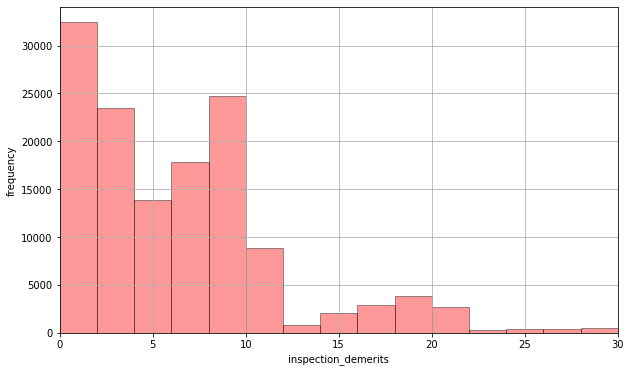

In [34]:
plt.figure(figsize=(10,6))
plt.grid()
dem = inspection[inspection.inspection_demerits.notna()].inspection_demerits
sns.distplot(dem, kde=False, color='red', hist_kws=dict(edgecolor="k", linewidth=1))
plt.xlim(0,30)
plt.ylabel('frequency')

#### Appears somewhat bi-modal around 0-3 and 8-10 demerits

In [35]:
inspection = inspection.sort_values(['business_id', 'inspection_date']).reset_index(drop=True)

In [36]:
inspection.tail(5)

serial_number permit_number facility_id_x      inspection_date  \
137870     DA1667053     PR0006284     FA0004345  2016-03-30 00:00:00   
137871     DA1667054     PR0006285     FA0004345  2016-03-30 00:00:00   
137872     DA1677968     PR0006284     FA0004345  2016-04-29 00:00:00   
137873     DA1677969     PR0006285     FA0004345  2016-04-29 00:00:00   
137874     DAV0GZWJT     PR0126710     FA0086488  2018-04-13 00:00:00   

            inspection_time employee_id  inspection_demerits inspection_grade  \
137870  2016-03-30 13:20:00   EE7001020                 12.0                B   
137871  2016-03-30 14:05:00   EE7001020                  9.0                B   
137872  2016-04-29 14:35:00   EE7001020                  8.0                P   
137873  2016-04-29 15:05:00   EE7001020                  0.0                P   
137874  2018-04-13 22:05:00   EE7001125                  0.0                A   

       inspection_grade_new inspection_result        violations  \
137870                    B       B Downgrade  212,213,215,2955   
137871                    B       B Downgrade      215,222,2955   
137872                 PASS         Compliant           206,212   
137873                 PASS         Compliant                -1   
137874                    A           A Grade              2926   

             record_updated     inspection_type             business_id  \
137870  2016-04-04 14:34:37  Routine Inspection  zzOo9n22fBbKAhbSpMzggA   
137871  2016-04-04 14:38:58  Routine Inspection  zzOo9n22fBbKAhbSpMzggA   
137872  2016-05-04 09:48:53       Re-inspection  zzOo9n22fBbKAhbSpMzggA   
137873  2016-05-04 09:49:12       Re-inspection  zzOo9n22fBbKAhbSpMzggA   
137874  2018-04-19 09:47:40  Routine Inspection  zzOo9n22fBbKAhbSpMzggA   

                             name             address_x       city  \
137870  Goodtimes Bar & Nightclub  1775 E Tropicana Ave  Las Vegas   
137871  Goodtimes Bar & Nightclub  1775 E Tropicana Ave  Las Vegas   
137872  Goodtimes Bar & Nightclub  1775 E Tropicana Ave  Las Vegas   
137873  Goodtimes Bar & Nightclub  1775 E Tropicana Ave  Las Vegas   
137874  Goodtimes Bar & Nightclub  1775 E Tropicana Ave  Las Vegas   

        postal_code  latitude_x  longitude_x  stars  review_count  is_open  \
137870      89119.0   36.099328  -115.128494    3.0          25.0      0.0   
137871      89119.0   36.099328  -115.128494    3.0          25.0      0.0   
137872      89119.0   36.099328  -115.128494    3.0          25.0      0.0   
137873      89119.0   36.099328  -115.128494    3.0          25.0      0.0   
137874      89119.0   36.099328  -115.128494    3.0          25.0      0.0   

                                                                                                 attributes  \
137870  {'RestaurantsGoodForGroups': 'True', 'NoiseLevel': "u'very_loud'", 'BusinessParking': "{'garage'...   
137871  {'RestaurantsGoodForGroups': 'True', 'NoiseLevel': "u'very_loud'", 'BusinessParking': "{'garage'...   
137872  {'RestaurantsGoodForGroups': 'True', 'NoiseLevel': "u'very_loud'", 'BusinessParking': "{'garage'...   
137873  {'RestaurantsGoodForGroups': 'True', 'NoiseLevel': "u'very_loud'", 'BusinessParking': "{'garage'...   
137874  {'RestaurantsGoodForGroups': 'True', 'NoiseLevel': "u'very_loud'", 'BusinessParking': "{'garage'...   

                                    categories      PE    zip_code nciaa  \
137870  Bars, Gay Bars, Dance Clubs, Nightlife  1016.0  89119-6529     Y   
137871  Bars, Gay Bars, Dance Clubs, Nightlife  1016.0  89119-6529     Y   
137872  Bars, Gay Bars, Dance Clubs, Nightlife  1016.0  89119-6529     Y   
137873  Bars, Gay Bars, Dance Clubs, Nightlife  1016.0  89119-6529     Y   
137874  Bars, Gay Bars, Dance Clubs, Nightlife  1016.0       89119   NaN   

        record_status current_grade  current_demerits         date_current  \
137870            2.0             A               8.0  2016-04-29 00:00:00   
137871            2.0             A               0.0  20

#### There is no significant difference in distribution of demerits accross cities

(0, 22)

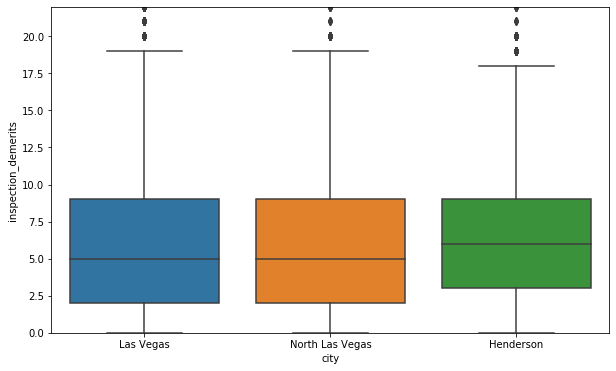

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x='city', y='inspection_demerits', data=inspection, order=('Las Vegas', 'North Las Vegas', 'Henderson'))
plt.ylim(0,22)

#### The top 10 restaurants (according to review ratings) have median demerits around acceptable values with more concerning outliers in the lower ranks

In [38]:
subset = inspection[inspection.business_id.isin(top_10.business_id)].reset_index(drop=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

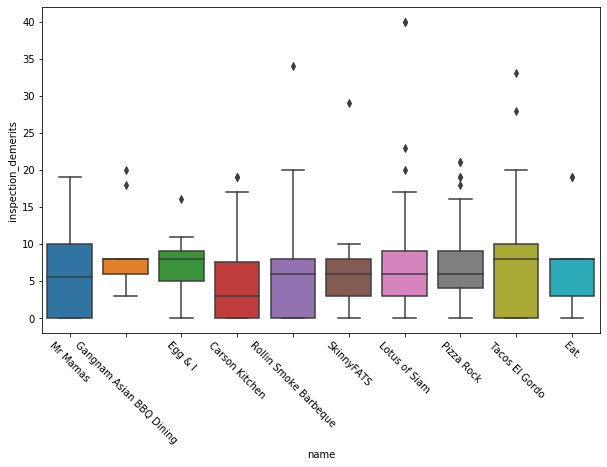

In [39]:
plt.figure(figsize=(10,6))
sns.boxplot(x='name', y='inspection_demerits', data=subset, order=top_10.name)
plt.xticks(rotation=-45)

#### Distribution of inspection_type counts over the years indicates some concern about the reinspections for years prior to 2011 and also shows that reinspections are roughly one-tenth of inspections per year

In [40]:
inspection.inspection_date = inspection.apply(lambda x: pd.to_datetime(x.inspection_date), axis=1)
inspection['year'] = pd.DatetimeIndex(inspection.inspection_date).year

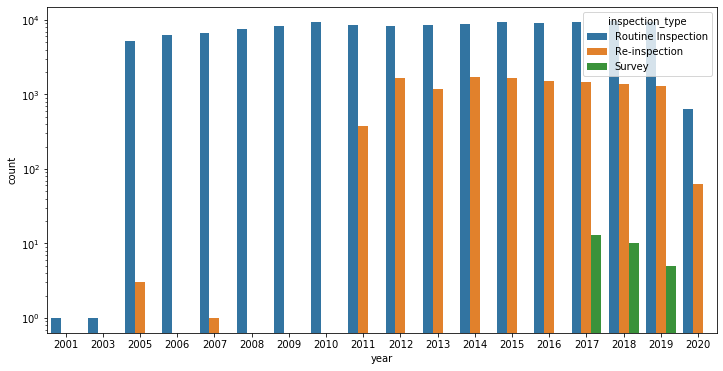

In [41]:
plt.figure(figsize=(12,6))
sns.countplot(x='year', data=inspection, hue='inspection_type')
plt.yscale('log')

### Distribution of Inspection results

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

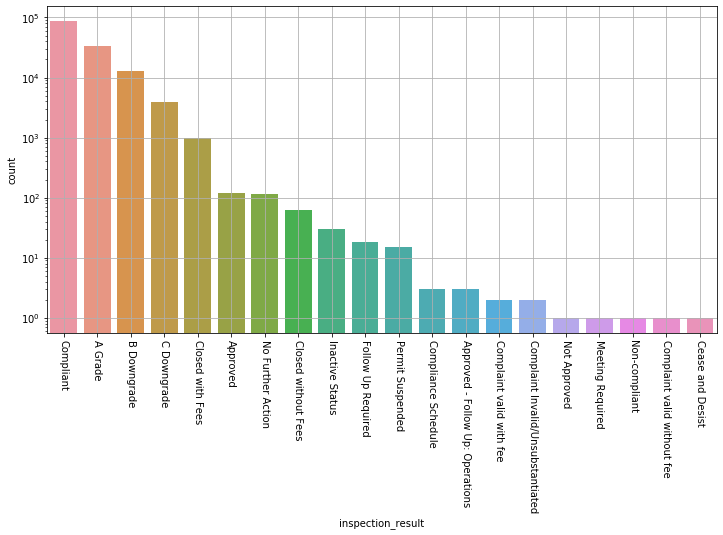

In [51]:
plt.figure(figsize=(12,6))
sns.countplot(x='inspection_result', data=inspection, order=inspection.inspection_result.value_counts().index)
plt.grid()
plt.yscale('log')
plt.xticks(rotation=-90)

In [98]:
rev.date = pd.to_datetime(rev.date)

#### The most valuable inspection result types to us are 'compliant', 'A grade', 'B downgrade', 'C downgrade', 'Closed with fees', 'Approved', 'No further action', 'Closed without fees', 'Inactive status', 'Follow up required', and 'Permit suspended'

In [42]:
rev.head()

review_id                 user_id             business_id  \
0  IByf6mVY0WA838XNSh-5MA  3CJUJILq7CLHk_9OrvpvQg  I4Nr-MVc26qWr08-S3Q1ow   
1  qm97yMwREr7BKkexlwLFbg  TTRVdTXKcq-xn6-1IWbwEw  Gyrez6K8f1AyR7dzW9fvAw   
2  0AsmPiAQduxh5jE_si8cLA  C_hUvw2z0R-Rv0yZb6QCZA  dm6sO_Y8JdKTE1ZM955yug   
3  j3vP8537KHvoXNHQIr3haA  Z_HE_KKT7N-WddPTzUQC7A  jScBTQtdAt-8RshaiBEHgw   
4  f0B9-r14-bLudyu5S7aLhw  SvMGr_Oih7ivtzmnCL-Tmg  ujHiaprwCQ5ewziu0Vi9rw   

   stars  useful  funny  cool                 date  \
0    4.0       0      0     0  2016-01-17 05:26:22   
1    5.0       0      0     1  2013-12-28 22:28:08   
2    5.0       0      0     0  2014-12-17 19:04:33   
3    5.0       1      0     1  2018-05-28 20:56:05   
4    1.0       1      0     0  2013-12-07 00:14:06   

                                                                                            text_clean  \
0  the food is always good and the prices are reasonable.  although it is not exactly a restaurant ...   
1  their pettuccine was fresh-made in the morning. it was very delicate and yummy! the owner and st...   
2  ended up here because raku was closed and it received great ratings on yelp.  i am so glad i cam...   
3  party of 3 ordered the fish tacos, pork belly banh mi, corn beef hash benedict, and bam ham. eve...   
4  we had dinner at the bellagio buffet last night. the service was ok. our server was great but ki...   

                                                                                          tokens_clean  \
0  ['food', 'always', 'good', 'prices', 'reasonable', 'although', 'exactly', 'restaurant', 'like', ...   
1  ['pettuccine', 'morning', 'delicate', 'yummy', 'owner', 'staffs', 'super', 'kind', 'delightful',...   
2  ['ended', 'raku', 'closed', 'received', 'great', 'ratings', 'yelp', 'glad', 'came', 'one', 'bett...   
3  ['party', 'ordered', 'fish', 'tacos', 'pork', 'belly', 'banh', 'mi', 'corn', 'beef', 'hash', 'be...   
4  ['dinner', 'bellagio', 'buffet', 'last', 'night', 'service', 'server', 'great', 'kind', 'forgot'...   

   review_length  
0             37  
1             15  
2             47  
3             57  
4             67

In [101]:
inspection.tail(20)

serial_number permit_number facility_id_x inspection_date  \
137855     DA0276013     PR0006285     FA0004345      2010-03-17   
137856     DA0276000     PR0006284     FA0004345      2011-03-15   
137857     DA0276001     PR0006284     FA0004345      2011-05-06   
137858     DA0276014     PR0006285     FA0004345      2011-05-06   
137859     DA1012920     PR0006284     FA0004345      2012-09-19   
137860     DA1029487     PR0006285     FA0004345      2012-11-30   
137861     DA1029486     PR0006284     FA0004345      2012-11-30   
137862     DA1035870     PR0006285     FA0004345      2012-12-28   
137863     DA1036087     PR0006284     FA0004345      2012-12-28   
137864     DA1110455     PR0006284     FA0004345      2013-10-09   
137865     DA1122831     PR0006285     FA0004345      2013-11-24   
137866     DA1148669     PR0006284     FA0004345      2014-03-07   
137867     DA1148671     PR0006285     FA0004345      2014-03-07   
137868     DA1556759     PR0006284     FA0004345      2015-07-28   
137869     DA1556771     PR0006285     FA0004345      2015-07-28   
137870     DA1667053     PR0006284     FA0004345      2016-03-30   
137871     DA1667054     PR0006285     FA0004345      2016-03-30   
137872     DA1677968     PR0006284     FA0004345      2016-04-29   
137873     DA1677969     PR0006285     FA0004345      2016-04-29   
137874     DAV0GZWJT     PR0126710     FA0086488      2018-04-13   

            inspection_time employee_id  inspection_demerits inspection_grade  \
137855  2010-03-17 14:30:00   EE7000857                 10.0                A   
137856  2011-03-15 14:30:00   EE7000857                 15.0                B   
137857  2011-05-06 22:25:00   EE7000857                  3.0                A   
137858  2011-05-06 23:05:00   EE7000857                  8.0                A   
137859  2012-09-19 11:30:00   EE7001012                 18.0                B   
137860  2012-11-30 23:30:00   EE7001012                 14.0                B   
137861                  NaN   EE7001089                 22.0                C   
137862                  NaN   EE7001012                  4.0                P   
137863                  NaN   EE7001061                  9.0                P   
137864  2013-10-09 21:20:00   EE7000857                  9.0                A   
137865  2013-11-24 00:25:00   EE7001030                  3.0                A   
137866  2014-03-07 12:50:00   EE7000559                  8.0                A   
137867  2014-03-07 14:30:00   EE7000559                  8.0                A   
137868  2015-07-28 15:05:00   EE7001020                  8.0                A   
137869  2015-07-28 15:50:00   EE7001020                  8.0                A   
137870  2016-03-30 13:20:00   EE7001020                 12.0                B   
137871  2016-03-30 14:05:00   EE7001020                  9.0                B   
137872  2016-04-29 14:35:00   EE7001020                  8.0                P   
137873  2016-04-29 15:05:00   EE7001020                  0.0                P   
137874  2018-04-13 22:05:00   EE7001125                  0.0                A   

       inspection_grade_new inspection_result  \
137855                    A         Compliant   
137856                    B       B Downgrade   
137857                    A         Compliant   
137858                    A         Compliant   
137859                    B       B Downgrade   
137860                    B       B Downgrade   
137861                    C       C Downgrade   
137862                 PASS         Compliant   
137863                 PASS         Compliant   
137864                    A         Compliant   
137865                    A         Compliant   
137866                    A         Compliant   
137867                    A         Compliant   
137868                    A         Compliant   
137869                    A         Compliant   
137870                    B       B Downgrade   
137871                    B       B Downgra

In [58]:
inspection.serial_number.nunique()

119788

In [59]:
inspection.shape[0]

137875

In [64]:
inspection.serial_number.value_counts()

DAL5NHOHI    5
DAOSSNJXE    5
DA1022552    5
DA1555512    5
DA0473068    5
DA1645737    5
DASQLS85D    5
DA0473071    5
DA1173964    5
DAYSUJJ1B    5
DA1279226    5
DA1173971    5
DA0473482    5
DA0473852    5
DAKDNV8GH    5
DA0473895    5
DA1133037    5
DA1640877    5
DA1553368    5
DA1640879    5
DAWJ0P9PU    5
DATO3U0CY    5
DADODNRGM    5
DA0473678    5
DA1119867    5
DA0473065    5
DAY4N4RTI    5
DA0475659    5
DA1173967    5
DA0473668    5
DA1152089    5
DA1039081    5
DAEWMKF09    5
DA8NN6O1U    5
DARFW0429    5
DA0879556    5
DABVJF1RA    5
DA0X0CV1V    5
DA1039697    5
DA0473851    5
DAXBLCSHP    5
DA0473483    5
DA1552293    5
DA0473850    5
DAEBAQ4MX    5
DA0879567    5
DAVWHEB8H    5
DAUBZGAGV    5
DA1450455    5
DA0473673    5
DA1039051    5
DAFDZZ00N    5
DA1565041    5
DA0473677    5
DA1006118    5
DA1015017    5
DA0473067    5
DA1177593    5
DA0468603    5
DA0475657    5
DA0473853    5
DA0473848    5
DAE86VG0H    5
DA0468602    5
DA1052492    5
DADNYUEJE    5
DA1740897 

In [65]:
inspection[inspection.serial_number=='DAL5NHOHI']

serial_number permit_number facility_id_x inspection_date  \
24516      DAL5NHOHI     PR0107202     FA0006647      2017-06-20   
47431      DAL5NHOHI     PR0107202     FA0006647      2017-06-20   
50189      DAL5NHOHI     PR0107202     FA0006647      2017-06-20   
74279      DAL5NHOHI     PR0107202     FA0006647      2017-06-20   
121667     DAL5NHOHI     PR0107202     FA0006647      2017-06-20   

            inspection_time employee_id  inspection_demerits inspection_grade  \
24516   2017-06-20 08:45:00   EE7001228                  6.0                A   
47431   2017-06-20 08:45:00   EE7001228                  6.0                A   
50189   2017-06-20 08:45:00   EE7001228                  6.0                A   
74279   2017-06-20 08:45:00   EE7001228                  6.0                A   
121667  2017-06-20 08:45:00   EE7001228                  6.0                A   

       inspection_grade_new inspection_result violations       record_updated  \
24516                     A           A Grade   216,2955  2017-06-20 11:32:41   
47431                     A           A Grade   216,2955  2017-06-20 11:32:41   
50189                     A           A Grade   216,2955  2017-06-20 11:32:41   
74279                     A           A Grade   216,2955  2017-06-20 11:32:41   
121667                    A           A Grade   216,2955  2017-06-20 11:32:41   

           inspection_type             business_id  \
24516   Routine Inspection  BIBWGO_r_1znnlmLbp4Nxg   
47431   Routine Inspection  Ko-c15eutBBh3xhQ_NiauA   
50189   Routine Inspection  M4vh_kzppP1nsxo7hsaVIA   
74279   Routine Inspection  X075p7boJU1j1JNHUj5UQQ   
121667  Routine Inspection  tByEVAaHu9Vm33deijKQBw   

                                 name         address_x       city  \
24516                   Golden Nugget  129 E Fremont St  Las Vegas   
47431              Golden Nugget Pool    129 Fremont St  Las Vegas   
50189            Golden Nugget Buffet  129 E Fremont St  Las Vegas   
74279        Claim Jumper Restaurants  129 E Fremont St  Las Vegas   
121667  Spa and Salon - Golden Nugget  129 E Fremont St  Las Vegas   

        postal_code  latitude_x  longitude_x  stars  review_count  is_open  \
24516       89101.0   36.169781  -115.145534    3.0        1949.0      1.0   
47431       89101.0   36.169813  -115.145530    4.0         129.0      1.0   
50189       89101.0   36.170044  -115.144858    2.5         343.0      1.0   
74279       89101.0   36.170226  -115.144570    3.5         274.0      1.0   
121667      89101.0   36.170165  -115.144958    3.5          40.0      1.0   

                                                                                                 attributes  \
24516   {'Alcohol': "u'full_bar'", 'NoiseLevel': "u'average'", 'OutdoorSeating': 'True', 'RestaurantsPri...   
47431   {'RestaurantsGoodForGroups': 'True', 'ByAppointmentOnly': 'False', 'RestaurantsPriceRange2': '2'...   
50189   {'RestaurantsTakeOut': 'False', 'RestaurantsPriceRange2': '2', 'BusinessAcceptsBitcoin': 'False'...   
74279   {'NoiseLevel': "'average'", 'WiFi': "'free'", 'Alcohol': "'full_bar'", 'OutdoorSeating': 'False'...   
121667  {'RestaurantsPriceRange2': '3', 'BusinessParking': "{'garage': True, 'street': False, 'validated...   

                                                                                                 categories  \
24516   Event Planning & Services, Arts & Entertainment, Buffets, Hotels & Travel, Casinos, Restaurants,...   
47431                                Cocktail Bars, Bars, Active Life, Aquariums, Nightlife, Swimming Pools   
50189                                                                                  Buffets, Restaurants   
74279   Sandwiches, Steakhouses, Food, American (Traditional), Nightlife, Burgers, Restaurants, Seafood,...   
121667                              Massage, Restaurants, Beauty & Spas, Hair Salons, Nail Salons, Day Spas   

            PE    zip_code nciaa  record_status current_grade  \
24516   10

### Sentiment analysis

In [110]:
from textblob import TextBlob

In [114]:
# rev['polarity'] = rev['text_clean'].map(lambda text: TextBlob(str(text)).sentiment.polarity)

In [115]:
# rev.to_csv(r"C:/users/abdul/Desktop/review_tokenized.csv")

In [ ]:
rev = pd.read_csv(r"C:/users/abdul/Desktop/review_tokenized.csv")

### Distribution of sentiment polarity

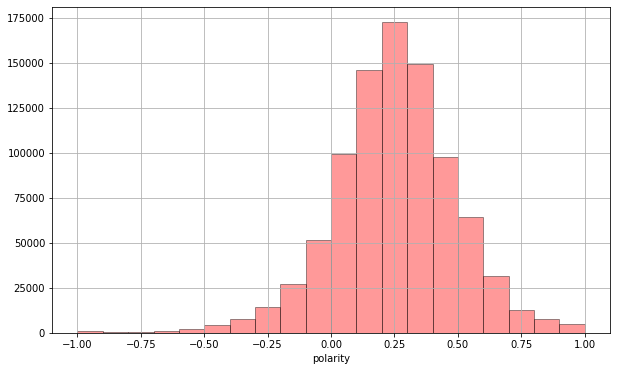

In [120]:
plt.figure(figsize=(10,6))
sns.distplot(rev.polarity, kde=False, color='r', bins=20, hist_kws=dict(edgecolor="k", linewidth=1))
plt.grid()

#### This shows that for most reviews in the dataset the sentiment is centered around 0.1 to 0.4 which is fairlly positive

In [99]:
def get_past_reviews(serial_number, window=90):
    upper_date = inspection[inspection.serial_number==serial_number].inspection_date
    upper_date = upper_date.iloc[0]
    lower_date = upper_date - pd.to_timedelta(window, unit='d')
    b_id = inspection[inspection.serial_number==serial_number].business_id
    b_id = b_id.iloc[0]
    return (rev[(rev.business_id == b_id) & (rev.date.between(lower_date, upper_date))])
    

In [106]:
get_past_reviews('DA1677969')

review_id                 user_id             business_id  \
3638   rUQ9B_QEwjJC9sVONUQZ5g  TM1R0BAvcSYsFJodL6O8jA  zzOo9n22fBbKAhbSpMzggA   
12715  QufkA568EFB2f9CMwUfxGA  73-u0a3G9Le4GWG7zLYWtg  zzOo9n22fBbKAhbSpMzggA   
46958  P_i78A3qXSEQMez2vhx_Fg  UuEoil7JIAijQuJ2TfmU0w  zzOo9n22fBbKAhbSpMzggA   
65093  i35vytaV1EZZQD-8_Z200g  Cbq8hyj9kksjFZ5HGhSxCw  zzOo9n22fBbKAhbSpMzggA   

       stars  useful  funny  cool                date  \
3638     5.0       0      0     0 2016-04-24 03:49:44   
12715    1.0       1      2     0 2016-03-09 17:50:53   
46958    5.0       0      0     0 2016-03-22 04:37:29   
65093    1.0       1      1     0 2016-03-04 01:02:46   

                                                                                                text_clean  \
3638   i came here last minute, so it was not really a planed thing but omg i loved it , there was a go...   
12715  we are locals that live across the road from good times, we was quiet happy being told that ther...   
46958  love this place. this is the best of vegas!!!! great music and drink specials with the most tale...   
65093         good place, they sheet you on the drinks. do not ask for top shelf you will get sheep  shit!   

                                                                                              tokens_clean  \
3638   ['came', 'last', 'minute', 'really', 'planed', 'thing', 'omg', 'loved', 'good', 'vibe', 'loved',...   
12715  ['locals', 'live', 'across', 'road', 'good', 'times', 'quiet', 'happy', 'told', 'gay', 'bar', 'a...   
46958  ['love', 'place', 'best', 'vegas', 'great', 'music', 'drink', 'specials', 'talented', 'bartender...   
65093                  ['good', 'place', 'sheet', 'drinks', 'ask', 'top', 'shelf', 'get', 'sheep', 'shit']   

       review_length  
3638              36  
12715            153  
46958             11  
65093             10

In [109]:
# pip install -U textblob

Note: you may need to restart the kernel to use updated packages.


In [ ]:
inspection['average_polarity'] = np.NAN
for serial in inspection.serial_number:
    reviews = get_past_reviews(serial)
    try:
        avg_polarity = reviews.polarity.mean()
        inspection.loc[inspection.serial_number==serial, 'average_polarity'] = avg_polarity
    except:
        continue


In [121]:
inspection.head()

serial_number permit_number facility_id_x inspection_date  \
0     DA0460740     PR0012803     FA0006546      2008-05-30   
1     DA0460747     PR0012803     FA0006546      2008-12-09   
2     DA0460748     PR0012803     FA0006546      2009-09-23   
3     DA0460749     PR0012803     FA0006546      2010-04-06   
4     DA0460750     PR0012803     FA0006546      2010-10-07   

       inspection_time employee_id  inspection_demerits inspection_grade  \
0  2008-05-30 06:00:00   EE7000449                  9.0                A   
1  2008-12-09 17:05:00   EE7000449                  9.0                A   
2  2009-09-23 08:00:00   EE7000449                 10.0                A   
3  2010-04-06 15:10:00   EE7000449                  6.0                A   
4  2010-10-07 17:00:00   EE7000449                  6.0                A   

  inspection_grade_new inspection_result            violations  \
0                    A         Compliant  13,19,22,28,30,36,38   
1                    A         Compliant  13,19,20,23,25,30,38   
2                    A         Compliant       13,20,23,31,112   
3                    A         Compliant           13,20,23,31   
4                    A         Compliant           13,23,30,31   

        record_updated     inspection_type             business_id  \
0  2013-02-21 22:26:12  Routine Inspection  -0BxAGlIk5DJAGVkpqBXxg   
1  2013-02-21 22:26:12  Routine Inspection  -0BxAGlIk5DJAGVkpqBXxg   
2  2013-02-21 22:26:12  Routine Inspection  -0BxAGlIk5DJAGVkpqBXxg   
3  2013-02-21 22:26:12  Routine Inspection  -0BxAGlIk5DJAGVkpqBXxg   
4  2013-02-21 22:26:12  Routine Inspection  -0BxAGlIk5DJAGVkpqBXxg   

                         name              address_x       city  postal_code  \
0  The Coffee Bean & Tea Leaf  3355 Las Vegas Blvd S  Las Vegas      89162.0   
1  The Coffee Bean & Tea Leaf  3355 Las Vegas Blvd S  Las Vegas      89162.0   
2  The Coffee Bean & Tea Leaf  3355 Las Vegas Blvd S  Las Vegas      89162.0   
3  The Coffee Bean & Tea Leaf  3355 Las Vegas Blvd S  Las Vegas      89162.0   
4  The Coffee Bean & Tea Leaf  3355 Las Vegas Blvd S  Las Vegas      89162.0   

   latitude_x  longitude_x  stars  review_count  is_open  \
0   36.122935  -115.168528    3.0          44.0      1.0   
1   36.122935  -115.168528    3.0          44.0      1.0   
2   36.122935  -115.168528    3.0          44.0      1.0   
3   36.122935  -115.168528    3.0          44.0      1.0   
4   36.122935  -115.168528    3.0          44.0      1.0   

                                                                                            attributes  \
0  {'RestaurantsPriceRange2': '2', 'BusinessAcceptsCreditCards': 'True', 'WiFi': "u'no'", 'BikePark...   
1  {'RestaurantsPriceRange2': '2', 'BusinessAcceptsCreditCards': 'True', 'WiFi': "u'no'", 'BikePark...   
2  {'RestaurantsPriceRange2': '2', 'BusinessAcceptsCreditCards': 'True', 'WiFi': "u'no'", 'BikePark...   
3  {'RestaurantsPriceRange2': '2', 'BusinessAcceptsCreditCards': 'True', 'WiFi': "u'no'", 'BikePark...   
4  {'RestaurantsPriceRange2': '2', 'BusinessAcceptsCreditCards': 'True', 'WiFi': "u'no'", 'BikePark...   

                        categories      PE    zip_code nciaa  record_status  \
0  Food, Restaurants, Coffee & Tea  1006.0  89109-8941     Y            2.0   
1  Food, Restaurants, Coffee & Tea  1006.0  89109-8941     Y            2.0   
2  Food, Restaurants, Coffee & Tea  1006.0  89109-8941     Y            2.0   
3  Food, Restaurants, Coffee & Tea  1006.0  89109-8941     Y            2.0   
4  Food, Restaurants, Coffee & Tea  1006.0  89109-8941     Y            2.0   

  current_grade  current_demerits         date_current previous_grade  \
0             A               3.0  2018-01-02 00:00:00              A   
1             A               3.0  2018-01-02 00:00:00              A   
2             A               3.0  2018-01-02 00:00:00              A   
3             A               3.0  2018-01-02 00:00:00              A   
4             A              